In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
from equations2 import SWFull
import equations3

In [3]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

/home/carter-koehler/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<IPython.core.display.Javascript object>


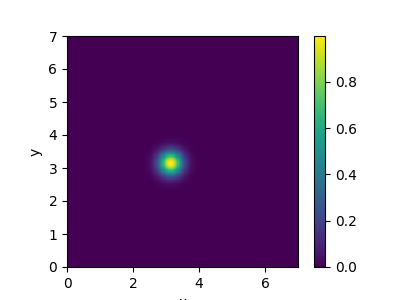

KeyboardInterrupt: 

In [3]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 7)
grid_y = field.UniformPeriodicGrid(resolution, 7)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = 0*x + 0.1
IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)
X = field.FieldSystem([u,v,h,H])
h.data[:] = IC
u.data[:] = 0*IC
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0
alpha = 0.1

sw_problem = SWFull(X, 2, g, f, b, nu)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        pcm.set_clim([0,np.max(h.data)])
        fig.canvas.draw()

<IPython.core.display.Javascript object>


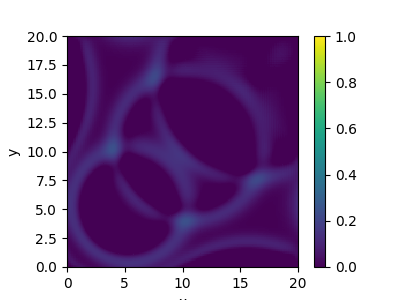

0.8954387552693147
0.6233578296821329
0.34647873279954905
0.2678983205953147
0.2446618661906995
0.22926435541658705
0.2165014372779023
0.27947053500294583
0.3286995307680344
0.3107274449290615
0.31642555126358446
0.3224789201102035
0.30776082512704755
0.29576650800391324
0.28523843416379646
0.2758952845008435
0.26760378193732043
0.25985262561842254
0.2528098217679982
0.24620725115962777
done


In [8]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

# BT = np.sin(x/2)*np.sin(y/2) + 3
BT = (0.1*x + 1) * (0.1*y + 1)
# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( - ( (x-5)**2 + (y-5)**2 ) )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )
IC += np.exp( - ( (x-10)**2 + (y-10)**2 ) )
IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([h,u,v,H])
# X = field.FieldSystem([h,u,v])
h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

H = 0.1
g = 9.81
nu = 0
f = 0.5
b = 0

alpha = 0.05

sw = equations3.linearSW(X, 2, g=g, f=f)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')

<IPython.core.display.Javascript object>


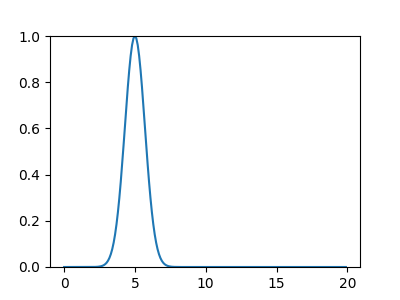

0.05000000000000002
0.10000000000000006
0.1500000000000001
0.20000000000000015
0.25000000000000017
0.3000000000000002
0.35000000000000026
0.4000000000000003
0.45000000000000034
0.5000000000000003
0.5500000000000004
0.6000000000000004
0.6500000000000005
0.7000000000000005
0.7500000000000006
0.8000000000000006
0.8500000000000006
0.9000000000000007
0.9500000000000007
1.0000000000000007


In [5]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 20)
# grid_y = field.UniformPeriodicGrid(resolution, 20)
domain = field.Domain([grid_x])
x, = domain.values()

BT = (0.1*x + 1)
# IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 ) )
IC = np.exp( -(x-5)**2 )
# IC += np.exp( - ( (x-15)**2 + (y-15)**2 ) )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )
# IC += np.exp( - ( (x-2)**2 + (y-7)**2 ) )


h = field.Field(domain)
u = field.Field(domain)
# v = field.Field(domain)
H = field.Field(domain)

# X = field.FieldSystem([u,v,h,H])
# X = field.FieldSystem([h,u,v])
X = field.FieldSystem([u,h,H])
h.data[:] = IC
u.data[:] = 0*IC
#H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0

alpha = 0.05

sw = equations3.linearSW1D(X, 2, g=g, f=f)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx


output_cadence = 10
fig = plt.figure(figsize=(4,3))
p, = plt.plot(x, u.data)
plt.ylim([0,1])
fig.canvas.draw()
while sw_problem.t < 1 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % output_cadence == 0:
        p.set_ydata(h.data)
        fig.canvas.draw()
        print(sw_problem.t)